In [1]:
import random
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from image_plot import plot_images, plot_with_labels
from matplotlib import pyplot as plt
from confusion_matrix_plot import plot_confusion_matrix

In [3]:
os.chdir('D:\PyCharm Professional\Projects\Deep Learning\CNN')

In [4]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'
classes = ['dog', 'cat']

In [5]:
# PREPARE BATCHES
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=classes, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=classes, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes = classes, batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [7]:
# MODEL
# input_shape=(224, 224, 3) means that the input is 224x224 px image with 3 RGB channels
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [9]:
# COMPILE MODEL
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# TRAIN MODEL
cnn_model.fit(
    x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 6s - loss: 30.7850 - accuracy: 0.5180 - val_loss: 8.5274 - val_accuracy: 0.5900
Epoch 2/10
100/100 - 9s - loss: 3.7048 - accuracy: 0.7250 - val_loss: 5.3690 - val_accuracy: 0.5800
Epoch 3/10
100/100 - 9s - loss: 0.7889 - accuracy: 0.8910 - val_loss: 4.5712 - val_accuracy: 0.5850
Epoch 4/10
100/100 - 9s - loss: 0.2180 - accuracy: 0.9420 - val_loss: 3.6868 - val_accuracy: 0.6100
Epoch 5/10
100/100 - 9s - loss: 0.1264 - accuracy: 0.9670 - val_loss: 3.2970 - val_accuracy: 0.6350
Epoch 6/10
100/100 - 6s - loss: 0.0646 - accuracy: 0.9800 - val_loss: 3.5662 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 4s - loss: 0.0408 - accuracy: 0.9870 - val_loss: 3.5930 - val_accuracy: 0.6000
Epoch 8/10
100/100 - 4s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 3.8905 - val_accuracy: 0.6200
Epoch 9/10
100/100 - 4s - loss: 0.0204 - accuracy: 0.9910 - val_loss: 3.6878 - val_accuracy: 0.6000
Epoch 10/10
100/100 - 4s - loss: 0.0551 - accuracy: 0.9870 - val_loss: 4.0241 - val_accuracy: 0.585

In [11]:
# PREDICT
predictions = cnn_model.predict(
    x=test_batches,
    steps=len(test_batches),
    verbose=0
)
predictions = np.round(predictions)

In [12]:
confusionMatrix = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions, axis=-1)
)

In [13]:
# class_indices is a dictionary containing the key 'class' : and weight value
cm_plot_labels = test_batches.class_indices

In [109]:
cm_plot_labels

{'dog': 0, 'cat': 1}

Confusion matrix, without normalization
[[43  7]
 [29 21]]


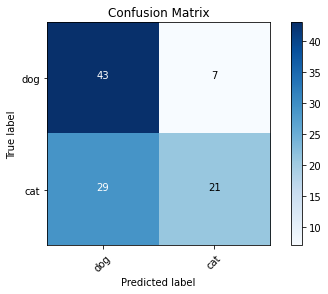

In [13]:
plot_confusion_matrix(
    cm=confusionMatrix,
    classes=test_batches.class_indices,
    title='Confusion Matrix')

In [14]:
# FINE TUNING USING VGG16 model
# download the vgg16 model
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# Create model for fine tuning
tuned_model = Sequential()

In [17]:
# add all layers except the last one to our tuned_model
for layer in vgg16_model.layers[:-1]:
    tuned_model.add(layer)

In [18]:
tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [19]:
# freeze all of the layers imported from trained vgg16 model, not to train them again
for layer in tuned_model.layers:
    layer.trainable = False

In [20]:
# add output Dense layer
tuned_model.add(
    Dense(units=2, activation='softmax')
)

In [21]:
tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [22]:
tuned_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
tuned_model.fit(
    x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 11s - loss: 0.1838 - accuracy: 0.9220 - val_loss: 0.1230 - val_accuracy: 0.9650
Epoch 2/10
100/100 - 11s - loss: 0.0724 - accuracy: 0.9740 - val_loss: 0.0948 - val_accuracy: 0.9650
Epoch 3/10
100/100 - 11s - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.0856 - val_accuracy: 0.9650
Epoch 4/10
100/100 - 11s - loss: 0.0374 - accuracy: 0.9910 - val_loss: 0.0819 - val_accuracy: 0.9700
Epoch 5/10
100/100 - 11s - loss: 0.0286 - accuracy: 0.9930 - val_loss: 0.0780 - val_accuracy: 0.9700
Epoch 6/10
100/100 - 11s - loss: 0.0223 - accuracy: 0.9940 - val_loss: 0.0762 - val_accuracy: 0.9700
Epoch 7/10
100/100 - 11s - loss: 0.0172 - accuracy: 0.9960 - val_loss: 0.0751 - val_accuracy: 0.9700
Epoch 8/10
100/100 - 11s - loss: 0.0139 - accuracy: 0.9980 - val_loss: 0.0739 - val_accuracy: 0.9700
Epoch 9/10
100/100 - 11s - loss: 0.0113 - accuracy: 0.9980 - val_loss: 0.0717 - val_accuracy: 0.9700
Epoch 10/10
100/100 - 11s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0707 - val_accura

In [24]:
assert tuned_model.history.history.get('accuracy')[-1] > 0.975

In [25]:
tuned_predictions = tuned_model.predict(
    x=test_batches,
    steps=len(test_batches),
    verbose=0
)
tuned_predictions = np.round(tuned_predictions)

In [26]:
tuned_confusionMatrix = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(tuned_predictions, axis=-1)
)

Confusion matrix, without normalization
[[50  0]
 [ 1 49]]


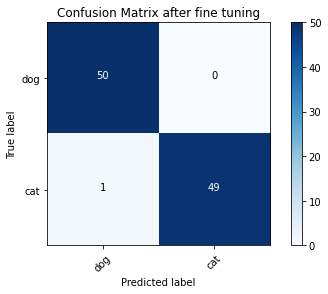

In [29]:
cm_plot_labels = test_batches.class_indices
plot_confusion_matrix(
    cm=tuned_confusionMatrix,
    classes=test_batches.class_indices,
    title='Confusion Matrix after fine tuning')

In [ ]:
# DATA AUGMENTATION

In [30]:
gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    channel_shift_range=10.,
    horizontal_flip=True
)

In [32]:
# chosen_image will be the name of the image from specified os.listdir('directory')
chosen_image = random.choice(os.listdir('data/train/dog'))

In [33]:
image_path = 'data/train/dog/' + chosen_image

In [34]:
assert os.path.isfile(image_path)

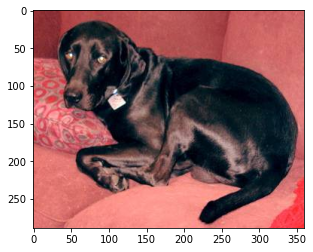

In [35]:
# Obtain the image
image = np.expand_dims(a=plt.imread(image_path), axis=0)
plt.imshow(image[0])

In [36]:
# Generate batches of augmented images using the generator
# numpy flow function takes data and generates batches of augmented data
aug_iter = gen.flow(image,
                    save_to_dir='data/train/dog',
                    save_prefix='aug-image-',
                    save_format='jpeg')

# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

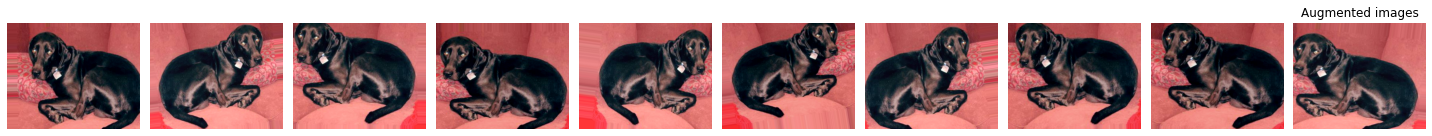

In [37]:
# Augmented Images
plot_images(aug_images, title='Augmented images')

In [ ]:
# AUGMENTED MODEL

In [39]:
aug_train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10
)
aug_valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10
)
aug_test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False
)

Found 1010 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [40]:
cnn_model.fit(
    x=aug_train_batches,
    steps_per_epoch=len(aug_train_batches),
    validation_data=aug_valid_batches,
    validation_steps=len(aug_valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
101/101 - 4s - loss: 5.8027 - accuracy: 0.3644 - val_loss: 0.7670 - val_accuracy: 0.5900
Epoch 2/10
101/101 - 4s - loss: 0.6603 - accuracy: 0.6475 - val_loss: 0.7162 - val_accuracy: 0.6050
Epoch 3/10
101/101 - 4s - loss: 0.4936 - accuracy: 0.7564 - val_loss: 0.7278 - val_accuracy: 0.6000
Epoch 4/10
101/101 - 4s - loss: 0.3841 - accuracy: 0.8386 - val_loss: 0.7393 - val_accuracy: 0.6000
Epoch 5/10
101/101 - 4s - loss: 0.2969 - accuracy: 0.9129 - val_loss: 0.7511 - val_accuracy: 0.6000
Epoch 6/10
101/101 - 4s - loss: 0.2288 - accuracy: 0.9426 - val_loss: 0.7612 - val_accuracy: 0.6100
Epoch 7/10
101/101 - 3s - loss: 0.1729 - accuracy: 0.9713 - val_loss: 0.7751 - val_accuracy: 0.6150
Epoch 8/10
101/101 - 4s - loss: 0.1288 - accuracy: 0.9871 - val_loss: 0.7933 - val_accuracy: 0.6200
Epoch 9/10
101/101 - 4s - loss: 0.0960 - accuracy: 0.9950 - val_loss: 0.8165 - val_accuracy: 0.6000
Epoch 10/10
101/101 - 4s - loss: 0.0728 - accuracy: 0.9980 - val_loss: 0.8375 - val_accuracy: 0.6300

In [42]:
aug_predictions = cnn_model.predict(
    x=aug_test_batches,
    steps=len(aug_test_batches),
    verbose=0
)
aug_predictions = np.round(aug_predictions)

In [43]:
aug_confusionMatrix = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(aug_predictions, axis=-1)
)

Confusion matrix, without normalization
[[33 17]
 [16 34]]


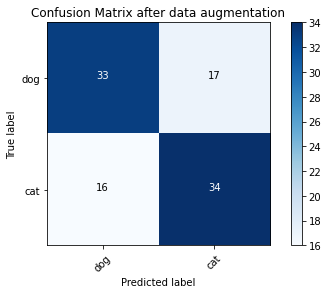

In [44]:
plot_confusion_matrix(
    cm=aug_confusionMatrix,
    classes=test_batches.class_indices,
    title='Confusion Matrix after data augmentation')

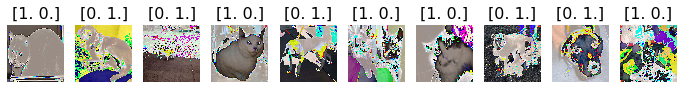

In [46]:
# Plot images with labels
# The title of each image is represented as one-hot-encoded vector
# next(aug_train_batches) contains an image with the corresponding label
# that label is one-hot encoded vector with size = number of classes (dog, cat = 2)
# 'dog' = 0, 'cat' = 1 => 'dog' = [1., 0.], 'cat' = [0., 1.,]
images, labels = next(aug_train_batches)
plot_with_labels(images, titles=labels)


